# Time Series Forecasting using Linear Regression (sample code)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Sample time series data
data = {'Date': pd.date_range(start='2022-01-01', periods=100, freq='D'),
        'Value': np.sin(np.arange(100) * 0.1) + np.random.randn(100) * 0.2}
df = pd.DataFrame(data)

In [5]:
df

,Date,Value
0,2022-01-01,-0.198608
1,2022-01-02,0.154873
2,2022-01-03,0.285576
3,2022-01-04,0.242750
4,2022-01-05,0.091096
...,...,...
95,2022-04-06,-0.140440
96,2022-04-07,0.122612
97,2022-04-08,-0.199715
98,2022-04-09,-0.385955


In [6]:
# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

In [7]:
train_size

80

In [8]:
train_data

,Date,Value
0,2022-01-01,-0.198608
1,2022-01-02,0.154873
2,2022-01-03,0.285576
3,2022-01-04,0.242750
4,2022-01-05,0.091096
...,...,...
75,2022-03-17,0.946943
76,2022-03-18,0.775468
77,2022-03-19,1.133506
78,2022-03-20,0.496872


In [9]:
test_data

,Date,Value
80,2022-03-22,0.941581
81,2022-03-23,0.979604
82,2022-03-24,0.583754
83,2022-03-25,1.083358
84,2022-03-26,0.593861
85,2022-03-27,0.508907
86,2022-03-28,0.444256
87,2022-03-29,0.875614
88,2022-03-30,0.517567
89,2022-03-31,0.568934


In [10]:
def create_lagged_features(data, lag):
    for i in range(1, lag + 1):
        data[f'Value_Lag_{i}'] = data['Value'].shift(i)
    return data

In [14]:
lag = 5  # Number of lag features to create
train_data = create_lagged_features(train_data, lag)
test_data = create_lagged_features(test_data, lag)

In [15]:
train_data

,Date,Value,Value_Lag_1,Value_Lag_2,Value_Lag_3,Value_Lag_4,Value_Lag_5
0,2022-01-01,-0.198608,NaN,NaN,NaN,NaN,NaN
1,2022-01-02,0.154873,-0.198608,NaN,NaN,NaN,NaN
2,2022-01-03,0.285576,0.154873,-0.198608,NaN,NaN,NaN
3,2022-01-04,0.242750,0.285576,0.154873,-0.198608,NaN,NaN
4,2022-01-05,0.091096,0.242750,0.285576,0.154873,-0.198608,NaN
...,...,...,...,...,...,...,...
75,2022-03-17,0.946943,0.945331,1.098676,0.934623,0.701685,0.840229
76,2022-03-18,0.775468,0.946943,0.945331,1.098676,0.934623,0.701685
77,2022-03-19,1.133506,0.775468,0.946943,0.945331,1.098676,0.934623
78,2022-03-20,0.496872,1.133506,0.775468,0.946943,0.945331,1.098676


In [16]:
test_data

,Date,Value,Value_Lag_1,Value_Lag_2,Value_Lag_3,Value_Lag_4,Value_Lag_5
80,2022-03-22,0.941581,NaN,NaN,NaN,NaN,NaN
81,2022-03-23,0.979604,0.941581,NaN,NaN,NaN,NaN
82,2022-03-24,0.583754,0.979604,0.941581,NaN,NaN,NaN
83,2022-03-25,1.083358,0.583754,0.979604,0.941581,NaN,NaN
84,2022-03-26,0.593861,1.083358,0.583754,0.979604,0.941581,NaN
85,2022-03-27,0.508907,0.593861,1.083358,0.583754,0.979604,0.941581
86,2022-03-28,0.444256,0.508907,0.593861,1.083358,0.583754,0.979604
87,2022-03-29,0.875614,0.444256,0.508907,0.593861,1.083358,0.583754
88,2022-03-30,0.517567,0.875614,0.444256,0.508907,0.593861,1.083358
89,2022-03-31,0.568934,0.517567,0.875614,0.444256,0.508907,0.593861


In [17]:
# Remove rows with NaN values (due to lag)
train_data, test_data = train_data.dropna(), test_data.dropna()

In [18]:
train_data

,Date,Value,Value_Lag_1,Value_Lag_2,Value_Lag_3,Value_Lag_4,Value_Lag_5
5,2022-01-06,0.551663,0.091096,0.242750,0.285576,0.154873,-0.198608
6,2022-01-07,0.355157,0.551663,0.091096,0.242750,0.285576,0.154873
7,2022-01-08,0.525241,0.355157,0.551663,0.091096,0.242750,0.285576
8,2022-01-09,0.750889,0.525241,0.355157,0.551663,0.091096,0.242750
9,2022-01-10,0.478343,0.750889,0.525241,0.355157,0.551663,0.091096
...,...,...,...,...,...,...,...
75,2022-03-17,0.946943,0.945331,1.098676,0.934623,0.701685,0.840229
76,2022-03-18,0.775468,0.946943,0.945331,1.098676,0.934623,0.701685
77,2022-03-19,1.133506,0.775468,0.946943,0.945331,1.098676,0.934623
78,2022-03-20,0.496872,1.133506,0.775468,0.946943,0.945331,1.098676


In [19]:
test_data

,Date,Value,Value_Lag_1,Value_Lag_2,Value_Lag_3,Value_Lag_4,Value_Lag_5
85,2022-03-27,0.508907,0.593861,1.083358,0.583754,0.979604,0.941581
86,2022-03-28,0.444256,0.508907,0.593861,1.083358,0.583754,0.979604
87,2022-03-29,0.875614,0.444256,0.508907,0.593861,1.083358,0.583754
88,2022-03-30,0.517567,0.875614,0.444256,0.508907,0.593861,1.083358
89,2022-03-31,0.568934,0.517567,0.875614,0.444256,0.508907,0.593861
90,2022-04-01,0.407033,0.568934,0.517567,0.875614,0.444256,0.508907
91,2022-04-02,0.264729,0.407033,0.568934,0.517567,0.875614,0.444256
92,2022-04-03,0.154928,0.264729,0.407033,0.568934,0.517567,0.875614
93,2022-04-04,0.201538,0.154928,0.264729,0.407033,0.568934,0.517567
94,2022-04-05,-0.186364,0.201538,0.154928,0.264729,0.407033,0.568934


In [20]:
# Define the target and features
X_train = train_data.iloc[:, 2:]  # Use lagged features as input
y_train = train_data['Value']

X_test = test_data.iloc[:, 2:]
y_test = test_data['Value']

In [22]:
X_train

,Value_Lag_1,Value_Lag_2,Value_Lag_3,Value_Lag_4,Value_Lag_5
5,0.091096,0.242750,0.285576,0.154873,-0.198608
6,0.551663,0.091096,0.242750,0.285576,0.154873
7,0.355157,0.551663,0.091096,0.242750,0.285576
8,0.525241,0.355157,0.551663,0.091096,0.242750
9,0.750889,0.525241,0.355157,0.551663,0.091096
...,...,...,...,...,...
75,0.945331,1.098676,0.934623,0.701685,0.840229
76,0.946943,0.945331,1.098676,0.934623,0.701685
77,0.775468,0.946943,0.945331,1.098676,0.934623
78,1.133506,0.775468,0.946943,0.945331,1.098676


In [23]:
y_train

5     0.551663
6     0.355157
7     0.525241
8     0.750889
9     0.478343
        ...   
75    0.946943
76    0.775468
77    1.133506
78    0.496872
79    1.006503
Name: Value, Length: 75, dtype: float64

In [24]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Make predictions
y_pred = model.predict(X_test)

In [26]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.05670450384810277


In [27]:
model.score(X_test, y_test)

0.6204692219974572

In [40]:
np.array(test_data.Date).reshape(-1, 1).shape

(15, 1)

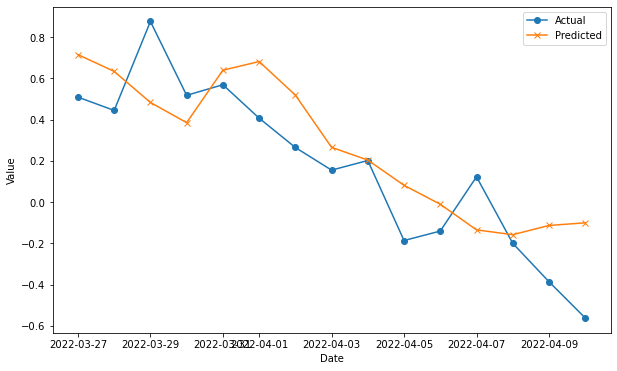

In [42]:
# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(np.array(test_data.Date).reshape(-1, 1), np.array(y_test).reshape(-1, 1), label='Actual', marker='o')
plt.plot(np.array(test_data.Date).reshape(-1, 1), np.array(y_pred).reshape(-1, 1), label='Predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()